# Symbolic programming to solve structural problems.

On this page the use of symbolic programming in the form of the `sympy`-package in `python` is explained.

In this package, you can define symbols with `sympy.symbols`. Basic algebraic calculations can now be programmed using standard symbols like `+`, `-`, `*` and `**`, while more advanced operations are available inside the `sympy`-package like `sympy.integrate` for integrating, `sympy.solve` for solving equations and `sympy.subs` for substitution.

## Example 1

![figuur 1](Data_College_introductie_MatrixFrame_opdracht/Opdracht_1.gif)

Allereest moeten de bibliotheken worden geïmporteerd. SymPy is de symbolische rekenbibliotheek voor Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

Alle wiskundige symbolen die later rechts van het `=` teken worden geïntroduceerd moeten eerst gedefinieerd worden zodat Python weet dat het om SymPy variabelen gaat. Daarbij moet voor de zakking moet worden aangegeven dat het een functie is.
Daarnaast moeten ook alle mogelijk integratieconstantes moeten worden gedefinieerd.

In [2]:
q, x = sp.symbols('q x')
L, EI = sp.symbols('L EI')
C1, C2, C3, C4 = sp.symbols('C1 C2 C3 C4')

De verplaatsingsfunctie kan dan geworden worden door viermaal te integreren met `integrate`, let op dat de je dan ook handmatig de integratieconstrantes definieert.
Met `display` wordt een variabele op een nette wiskundige manier weergegeven

In [3]:
V = sp.integrate(-q,x)+C1
M = sp.integrate(V,x)+C2
kappa = M / EI
phi = sp.integrate(kappa,x)+C3
w = sp.integrate(-phi,x)+C4
display(w)

-C1*x**3/(6*EI) - C2*x**2/(2*EI) - C3*x + C4 + q*x**4/(24*EI)

Nu kunnen de randvoorwaarden worden ingevuld. Met `.subs` vervang je een variabele in een vergelijking door een andere variabele of een getal. Met `sp.Eq` definieer je een vergelijking met een linker en rechterzijde.

In [4]:
Eq1 = sp.Eq(w.subs(x, 0), 0) 
Eq2 = sp.Eq(w.subs(x, L), 0)
Eq3 = sp.Eq(M.subs(x, 0), 0)
Eq4 = sp.Eq(M.subs(x, L), 0)
display(Eq1,Eq2,Eq3,Eq4)

Eq(C4, 0)

Eq(-C1*L**3/(6*EI) - C2*L**2/(2*EI) - C3*L + C4 + L**4*q/(24*EI), 0)

Eq(C2, 0)

Eq(C1*L + C2 - L**2*q/2, 0)

De integratieconstantes kunnen nu worden opgelost. Met `sp.solve` wordt de set vergelijkingen van de randvoorwaarden opgelost voor de onbekende integratieconstantes.

In [5]:
sol = sp.solve((Eq1,Eq2,Eq3,Eq4),(C1,C2,C3,C4))
display(sol)

{C1: L*q/2, C2: 0, C3: -L**3*q/(24*EI), C4: 0}

De gevonden integratieconstructies kunnen nu worden ingevoerd in de originele functie voor $w$

In [6]:
w_sol = w.subs(sol)
display(w_sol)

L**3*q*x/(24*EI) - L*q*x**3/(12*EI) + q*x**4/(24*EI)

Voor de numerieke waarde kunnen de symbolen worden vervangen door getalwaardes.

In [7]:
w_subs = w_sol.subs([(EI,1000),(q,5),(L,10)])
display(w_subs)

x**4/4800 - x**3/240 + 5*x/24

Om de gevonden functie te plotten is het handig de SymPy vergelijking om te schrijven naar NumPy functie, `sp.lambdify` doet dat voor je. Vervolgens kan je met bekende functies van NumPy en Matplotlib een grafiek plotten.

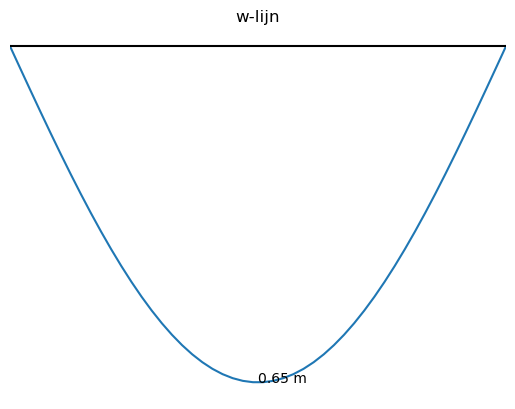

In [8]:
w_numpy = sp.lambdify(x,w_subs) 
x_plot = np.linspace(0,10,50)
w_plot = w_numpy(x_plot)
plt.plot(x_plot,w_plot)
plt.gca().invert_yaxis() # draait de y-as om
plt.title("w-lijn")
plt.axhline(0,color='black') #geeft een horizontale lijn op w=0 weer
plt.xlim(0,10)
plt.annotate('%.2f m' % w_numpy(5), xy = [5,w_numpy(5)]) #geeft de getalswaarde weer in de grafiek
plt.axis('off');

De $\phi$, $M$ en $V$-lijn kunnen op gelijke wijze worden gevonden als de $w-$lijn.

-L**3*q/(24*EI) + L*q*x**2/(4*EI) - q*x**3/(6*EI)

-x**3/1200 + x**2/80 - 5/24

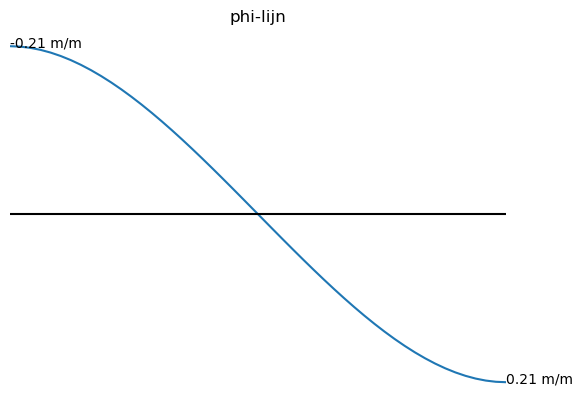

In [9]:
phi_sol = phi.subs(sol)
display(phi_sol)

phi_subs = phi_sol.subs([(EI,1000),(q,5),(L,10)])
display(phi_subs)

phi_numpy = sp.lambdify(x,phi_subs)
phi_plot = phi_numpy(x_plot)
plt.figure()
plt.plot(x_plot,phi_plot)
plt.gca().invert_yaxis()
plt.title("phi-lijn")
plt.axhline(0,color='black')
plt.xlim(0,10)
plt.annotate('%.2f m/m' % phi_numpy(0),xy = [0,phi_numpy(0)])
plt.annotate('%.2f m/m' % phi_numpy(10),xy = [10,phi_numpy(10)])
plt.axis('off');

L*q*x/2 - q*x**2/2

-5*x**2/2 + 25*x

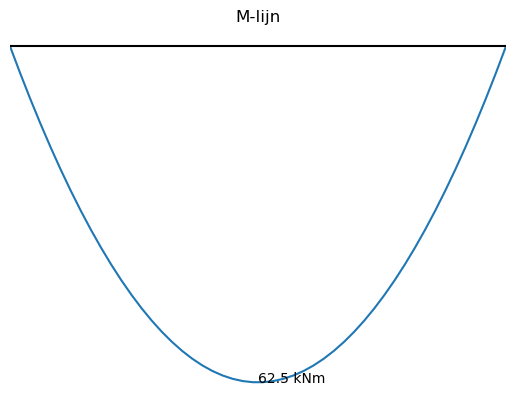

In [10]:
M_sol = M.subs(sol)
display(M_sol)

M_subs = M_sol.subs([(EI,1000),(q,5),(L,10)])
display(M_subs)

M_numpy = sp.lambdify(x,M_subs)
M_plot = M_numpy(x_plot)
plt.figure()
plt.plot(x_plot,M_plot)
plt.gca().invert_yaxis()
plt.title("M-lijn")
plt.axhline(0,color='black')
plt.xlim(0,10)
plt.annotate('%.1f kNm' % M_numpy(5),xy = [5,M_numpy(5)])
plt.axis('off');

L*q/2 - q*x

25 - 5*x

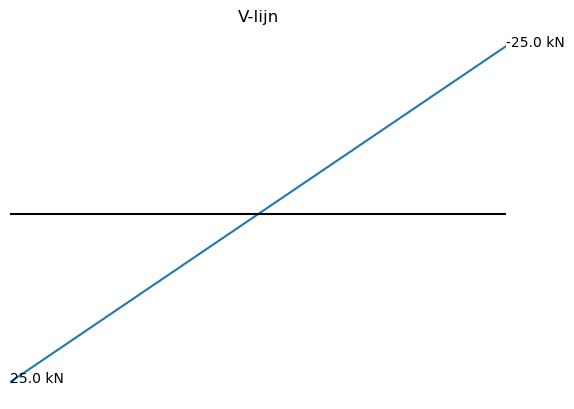

In [11]:
V_sol = V.subs(sol)
display(V_sol)

V_subs = V_sol.subs([(EI,1000),(q,5),(L,10)])
display(V_subs)

V_numpy = sp.lambdify(x,V_subs)
V_plot = V_numpy(x_plot)
plt.figure()
plt.plot(x_plot,V_plot)
plt.gca().invert_yaxis()
plt.title("V-lijn")
plt.axhline(0,color='black')
plt.xlim(0,10)
plt.annotate('%.1f kN' % V_numpy(0),xy = [0,V_numpy(0)])
plt.annotate('%.1f kN' % V_numpy(10),xy = [10,V_numpy(10)])
plt.axis('off');

## Opdracht 2 ##

## Opdracht 2
ALs de ligger uit meerdere velden bestaat, kan deze met meerdere differentiaalvergelijkingen worden opgelost.

![figuur 1](Data_College_introductie_MatrixFrame_opdracht/Opdracht_2.gif)


Voor elk veld moeten allereerst apart de symbolen worden gedefiniëerd

In [12]:
q1, q2 = sp.symbols('q1 q2')
F, L1, L2, EI = sp.symbols('F L1 L2 EI')
C1, C2, C3, C4, C5, C6, C7, C8 = sp.symbols('C1 C2 C3 C4 C5 C6 C7 C8')
x = sp.symbols('x')

De vergelijkingen moeten gelijktijdig worden opgelost zodat er 8 verschillende integratieconstantes worden opgesteld

In [13]:
V1 = sp.integrate(-q1,x)+C1
M1 = sp.integrate(V1,x)+C2
kappa1 = M1 / EI
phi1 = sp.integrate(kappa1,x)+C3
w1 = sp.integrate(-phi1,x)+C4
display(w1)

V2 = sp.integrate(-q2,x)+C5
M2 = sp.integrate(V2,x)+C6
kappa2 = M2 / EI
phi2 = sp.integrate(kappa2,x)+C7
w2 = sp.integrate(-phi2,x)+C8
display(w2)

Eq1 = sp.Eq(w1.subs(x,0),0)
Eq2 = sp.Eq(phi1.subs(x,0),0)
Eq3 = sp.Eq(w1.subs(x,L1),w2.subs(x,L1))
Eq4 = sp.Eq(M1.subs(x,L1),M2.subs(x,L1))
Eq5 = sp.Eq(V1.subs(x,L1),V2.subs(x,L1)+F)
Eq6 = sp.Eq(phi1.subs(x,L1),phi2.subs(x,L1))
Eq7 = sp.Eq(w2.subs(x,L1+L2),0)
Eq8 = sp.Eq(M2.subs(x,L1+L2),0)
display(Eq1,Eq2,Eq3,Eq4,Eq5,Eq6,Eq7,Eq8)

-C1*x**3/(6*EI) - C2*x**2/(2*EI) - C3*x + C4 + q1*x**4/(24*EI)

-C5*x**3/(6*EI) - C6*x**2/(2*EI) - C7*x + C8 + q2*x**4/(24*EI)

Eq(C4, 0)

Eq(C3, 0)

Eq(-C1*L1**3/(6*EI) - C2*L1**2/(2*EI) - C3*L1 + C4 + L1**4*q1/(24*EI), -C5*L1**3/(6*EI) - C6*L1**2/(2*EI) - C7*L1 + C8 + L1**4*q2/(24*EI))

Eq(C1*L1 + C2 - L1**2*q1/2, C5*L1 + C6 - L1**2*q2/2)

Eq(C1 - L1*q1, C5 + F - L1*q2)

Eq(C1*L1**2/(2*EI) + C2*L1/EI + C3 - L1**3*q1/(6*EI), C5*L1**2/(2*EI) + C6*L1/EI + C7 - L1**3*q2/(6*EI))

Eq(-C5*(L1 + L2)**3/(6*EI) - C6*(L1 + L2)**2/(2*EI) - C7*(L1 + L2) + C8 + q2*(L1 + L2)**4/(24*EI), 0)

Eq(C5*(L1 + L2) + C6 - q2*(L1 + L2)**2/2, 0)

In [14]:
sol = sp.solve((Eq1,Eq2,Eq3,Eq4,Eq5,Eq6,Eq7,Eq8),(C1,C2,C3,C4,C5,C6,C7,C8))
display(sol[C1])
display(sol[C2])
display(sol[C3])
display(sol[C4])
display(sol[C5])
display(sol[C6])
display(sol[C7])
display(sol[C8])

(12*F*L1**2*L2 + 24*F*L1*L2**2 + 8*F*L2**3 + 5*L1**4*q1 + 20*L1**3*L2*q1 + 24*L1**2*L2**2*q1 + 6*L1**2*L2**2*q2 + 8*L1*L2**3*q1 + 12*L1*L2**3*q2 + 5*L2**4*q2)/(8*L1**3 + 24*L1**2*L2 + 24*L1*L2**2 + 8*L2**3)

(-4*F*L1**2*L2 - 8*F*L1*L2**2 - L1**4*q1 - 4*L1**3*L2*q1 - 4*L1**2*L2**2*q1 - 2*L1**2*L2**2*q2 - 4*L1*L2**3*q2 - L2**4*q2)/(8*L1**2 + 16*L1*L2 + 8*L2**2)

0

0

(-8*F*L1**3 - 12*F*L1**2*L2 - 3*L1**4*q1 + 8*L1**4*q2 - 4*L1**3*L2*q1 + 24*L1**3*L2*q2 + 30*L1**2*L2**2*q2 + 20*L1*L2**3*q2 + 5*L2**4*q2)/(8*L1**3 + 24*L1**2*L2 + 24*L1*L2**2 + 8*L2**3)

(8*F*L1**3 + 12*F*L1**2*L2 + 3*L1**4*q1 - 4*L1**4*q2 + 4*L1**3*L2*q1 - 8*L1**3*L2*q2 - 6*L1**2*L2**2*q2 - 4*L1*L2**3*q2 - L2**4*q2)/(8*L1**2 + 16*L1*L2 + 8*L2**2)

(-3*F*L1**2 - L1**3*q1 + L1**3*q2)/(6*EI)

(-4*F*L1**3 - L1**4*q1 + L1**4*q2)/(24*EI)

In [15]:
w1_sol = w1.subs(sol)
w2_sol = w2.subs(sol)
display(w1_sol,w2_sol)

q1*x**4/(24*EI) - x**3*(12*F*L1**2*L2 + 24*F*L1*L2**2 + 8*F*L2**3 + 5*L1**4*q1 + 20*L1**3*L2*q1 + 24*L1**2*L2**2*q1 + 6*L1**2*L2**2*q2 + 8*L1*L2**3*q1 + 12*L1*L2**3*q2 + 5*L2**4*q2)/(6*EI*(8*L1**3 + 24*L1**2*L2 + 24*L1*L2**2 + 8*L2**3)) - x**2*(-4*F*L1**2*L2 - 8*F*L1*L2**2 - L1**4*q1 - 4*L1**3*L2*q1 - 4*L1**2*L2**2*q1 - 2*L1**2*L2**2*q2 - 4*L1*L2**3*q2 - L2**4*q2)/(2*EI*(8*L1**2 + 16*L1*L2 + 8*L2**2))

q2*x**4/(24*EI) - x**3*(-8*F*L1**3 - 12*F*L1**2*L2 - 3*L1**4*q1 + 8*L1**4*q2 - 4*L1**3*L2*q1 + 24*L1**3*L2*q2 + 30*L1**2*L2**2*q2 + 20*L1*L2**3*q2 + 5*L2**4*q2)/(6*EI*(8*L1**3 + 24*L1**2*L2 + 24*L1*L2**2 + 8*L2**3)) - x**2*(8*F*L1**3 + 12*F*L1**2*L2 + 3*L1**4*q1 - 4*L1**4*q2 + 4*L1**3*L2*q1 - 8*L1**3*L2*q2 - 6*L1**2*L2**2*q2 - 4*L1*L2**3*q2 - L2**4*q2)/(2*EI*(8*L1**2 + 16*L1*L2 + 8*L2**2)) - x*(-3*F*L1**2 - L1**3*q1 + L1**3*q2)/(6*EI) + (-4*F*L1**3 - L1**4*q1 + L1**4*q2)/(24*EI)

In [16]:
w1_subs = w1_sol.subs([(EI,1000),(F,20),(q1,0),(q2,8),(L1,3),(L2,5)])
w2_subs = w2_sol.subs([(EI,1000),(F,20),(q1,0),(q2,8),(L1,3),(L2,5)])
display(w1_subs,w2_subs)

-231*x**3/40960 + 181*x**2/5120

x**4/3000 - 19373*x**3/3072000 + 2989*x**2/128000 + 27*x/500 - 63/1000

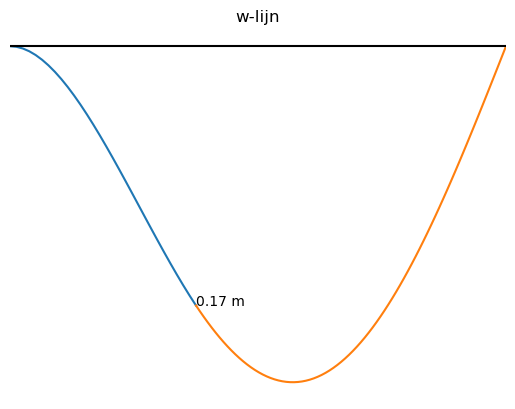

In [17]:
x1_plot = np.linspace(0,3,30)
x2_plot = np.linspace(3,8,80)
w1_numpy = sp.lambdify(x,w1_subs)
w2_numpy = sp.lambdify(x,w2_subs)
w1_plot = w1_numpy(x1_plot)
w2_plot = w2_numpy(x2_plot)
plt.plot(x1_plot,w1_plot)
plt.plot(x2_plot,w2_plot)
plt.gca().invert_yaxis()
plt.title("w-lijn")
plt.axhline(0,color='black')
plt.xlim(0,8)
plt.annotate('%.2f m' % w1_numpy(3),xy = [3,w1_numpy(3)])
plt.axis('off');

-q1*x**3/(6*EI) + x**2*(12*F*L1**2*L2 + 24*F*L1*L2**2 + 8*F*L2**3 + 5*L1**4*q1 + 20*L1**3*L2*q1 + 24*L1**2*L2**2*q1 + 6*L1**2*L2**2*q2 + 8*L1*L2**3*q1 + 12*L1*L2**3*q2 + 5*L2**4*q2)/(2*EI*(8*L1**3 + 24*L1**2*L2 + 24*L1*L2**2 + 8*L2**3)) + x*(-4*F*L1**2*L2 - 8*F*L1*L2**2 - L1**4*q1 - 4*L1**3*L2*q1 - 4*L1**2*L2**2*q1 - 2*L1**2*L2**2*q2 - 4*L1*L2**3*q2 - L2**4*q2)/(EI*(8*L1**2 + 16*L1*L2 + 8*L2**2))

-q2*x**3/(6*EI) + x**2*(-8*F*L1**3 - 12*F*L1**2*L2 - 3*L1**4*q1 + 8*L1**4*q2 - 4*L1**3*L2*q1 + 24*L1**3*L2*q2 + 30*L1**2*L2**2*q2 + 20*L1*L2**3*q2 + 5*L2**4*q2)/(2*EI*(8*L1**3 + 24*L1**2*L2 + 24*L1*L2**2 + 8*L2**3)) + x*(8*F*L1**3 + 12*F*L1**2*L2 + 3*L1**4*q1 - 4*L1**4*q2 + 4*L1**3*L2*q1 - 8*L1**3*L2*q2 - 6*L1**2*L2**2*q2 - 4*L1*L2**3*q2 - L2**4*q2)/(EI*(8*L1**2 + 16*L1*L2 + 8*L2**2)) + (-3*F*L1**2 - L1**3*q1 + L1**3*q2)/(6*EI)

693*x**2/40960 - 181*x/2560

-x**3/750 + 19373*x**2/1024000 - 2989*x/64000 - 27/500

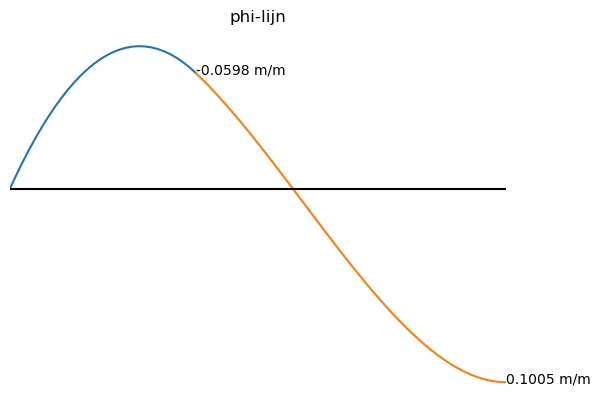

In [18]:
phi1_sol = phi1.subs(sol)
phi2_sol = phi2.subs(sol)
display(phi1_sol, phi2_sol)

phi1_subs = phi1_sol.subs([(EI,1000),(F,20),(q1,0),(q2,8),(L1,3),(L2,5)])
phi2_subs = phi2_sol.subs([(EI,1000),(F,20),(q1,0),(q2,8),(L1,3),(L2,5)])
display(phi1_subs, phi2_subs)

phi1_numpy = sp.lambdify(x,phi1_subs)
phi2_numpy = sp.lambdify(x,phi2_subs)
phi1_plot = phi1_numpy(x1_plot)
phi2_plot = phi2_numpy(x2_plot)
plt.figure()
plt.plot(x1_plot,phi1_plot)
plt.plot(x2_plot,phi2_plot)
plt.gca().invert_yaxis()
plt.title("phi-lijn")
plt.axhline(0,color='black')
plt.xlim(0,8)
plt.annotate('%.4f m/m' % phi1_numpy(3),xy = [3,phi1_numpy(3)])
plt.annotate('%.4f m/m' % phi2_numpy(8),xy = [8,phi2_numpy(8)])
plt.axis('off');

-q1*x**2/2 + x*(12*F*L1**2*L2 + 24*F*L1*L2**2 + 8*F*L2**3 + 5*L1**4*q1 + 20*L1**3*L2*q1 + 24*L1**2*L2**2*q1 + 6*L1**2*L2**2*q2 + 8*L1*L2**3*q1 + 12*L1*L2**3*q2 + 5*L2**4*q2)/(8*L1**3 + 24*L1**2*L2 + 24*L1*L2**2 + 8*L2**3) + (-4*F*L1**2*L2 - 8*F*L1*L2**2 - L1**4*q1 - 4*L1**3*L2*q1 - 4*L1**2*L2**2*q1 - 2*L1**2*L2**2*q2 - 4*L1*L2**3*q2 - L2**4*q2)/(8*L1**2 + 16*L1*L2 + 8*L2**2)

-q2*x**2/2 + x*(-8*F*L1**3 - 12*F*L1**2*L2 - 3*L1**4*q1 + 8*L1**4*q2 - 4*L1**3*L2*q1 + 24*L1**3*L2*q2 + 30*L1**2*L2**2*q2 + 20*L1*L2**3*q2 + 5*L2**4*q2)/(8*L1**3 + 24*L1**2*L2 + 24*L1*L2**2 + 8*L2**3) + (8*F*L1**3 + 12*F*L1**2*L2 + 3*L1**4*q1 - 4*L1**4*q2 + 4*L1**3*L2*q1 - 8*L1**3*L2*q2 - 6*L1**2*L2**2*q2 - 4*L1*L2**3*q2 - L2**4*q2)/(8*L1**2 + 16*L1*L2 + 8*L2**2)

17325*x/512 - 4525/64

-4*x**2 + 19373*x/512 - 2989/64

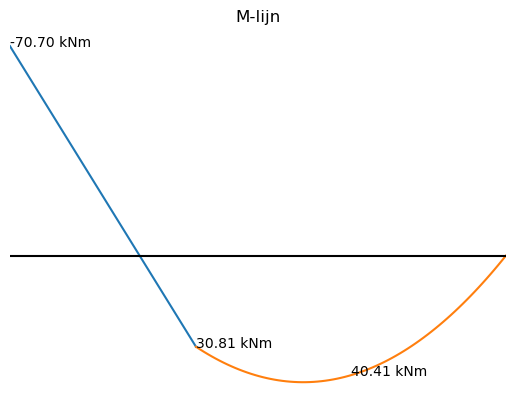

In [19]:
M1_sol = M1.subs(sol)
M2_sol = M2.subs(sol)
display(M1_sol, M2_sol)

M1_subs = M1_sol.subs([(EI,1000),(F,20),(q1,0),(q2,8),(L1,3),(L2,5)])
M2_subs = M2_sol.subs([(EI,1000),(F,20),(q1,0),(q2,8),(L1,3),(L2,5)])
display(M1_subs, M2_subs)

M1_numpy = sp.lambdify(x,M1_subs)
M2_numpy = sp.lambdify(x,M2_subs)
M1_plot = M1_numpy(x1_plot)
M2_plot = M2_numpy(x2_plot)
plt.figure()
plt.plot(x1_plot,M1_plot)
plt.plot(x2_plot,M2_plot)
plt.gca().invert_yaxis()
plt.title("M-lijn")
plt.axhline(0,color='black')
plt.xlim(0,8)
plt.annotate('%.2f kNm' % M1_numpy(0),xy = [0,M1_numpy(0)])
plt.annotate('%.2f kNm' % M1_numpy(3),xy = [3,M1_numpy(3)])
plt.annotate('%.2f kNm' % M2_numpy(5.5),xy = [5.5,M2_numpy(5.5)])
plt.axis('off');

-q1*x + (12*F*L1**2*L2 + 24*F*L1*L2**2 + 8*F*L2**3 + 5*L1**4*q1 + 20*L1**3*L2*q1 + 24*L1**2*L2**2*q1 + 6*L1**2*L2**2*q2 + 8*L1*L2**3*q1 + 12*L1*L2**3*q2 + 5*L2**4*q2)/(8*L1**3 + 24*L1**2*L2 + 24*L1*L2**2 + 8*L2**3)

-q2*x + (-8*F*L1**3 - 12*F*L1**2*L2 - 3*L1**4*q1 + 8*L1**4*q2 - 4*L1**3*L2*q1 + 24*L1**3*L2*q2 + 30*L1**2*L2**2*q2 + 20*L1*L2**3*q2 + 5*L2**4*q2)/(8*L1**3 + 24*L1**2*L2 + 24*L1*L2**2 + 8*L2**3)

17325/512

19373/512 - 8*x

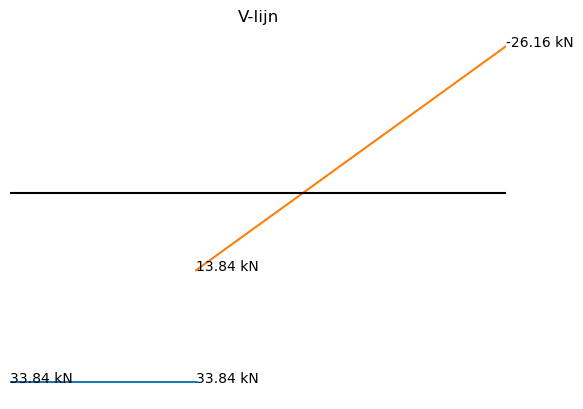

In [20]:
V1_sol = V1.subs(sol)
V2_sol = V2.subs(sol)
display(V1_sol, V2_sol)

V1_subs = V1_sol.subs([(EI,1000),(F,20),(q1,0),(q2,8),(L1,3),(L2,5)])
V2_subs = V2_sol.subs([(EI,1000),(F,20),(q1,0),(q2,8),(L1,3),(L2,5)])
display(V1_subs, V2_subs)

V1_numpy = sp.lambdify(x,V1_subs)
V2_numpy = sp.lambdify(x,V2_subs)
V1_plot = V1_numpy(x1_plot)
V2_plot = V2_numpy(x2_plot)
plt.figure()
plt.plot([0,3],[V1_plot,V1_plot])
plt.plot(x2_plot,V2_plot)
plt.gca().invert_yaxis()
plt.title("V-lijn")
plt.axhline(0,color='black')
plt.xlim(0,8) 
plt.annotate('%.2f kN' % V1_numpy(0),xy = [0,V1_numpy(0)])
plt.annotate('%.2f kN' % V1_numpy(3),xy = [3,V1_numpy(3)])
plt.annotate('%.2f kN' % V2_numpy(3),xy = [3,V2_numpy(3)])
plt.annotate('%.2f kN' % V2_numpy(8),xy = [8,V2_numpy(8)])
plt.axis('off');